## Exploring off the shelf VADs

In [1]:
import soundfile
import librosa
import torch
import torchaudio.functional as F
from speechbrain.pretrained import VAD
import matplotlib.pyplot as plt
import tempfile


from IPython.display import display, Audio

In [2]:
vad_model = VAD.from_hparams(source='speechbrain/vad-crdnn-libriparty')

In [3]:
audio_path = '/home/taras/data/mls_spanish/dev/audio/10367/10282/10367_10282_000002.flac'
audio_path = "/data/podcasts/El hilo/La-ultima-clinica-de-aborto-en-la-frontera-sur-de-Texas.mp3"

wav, sr = librosa.load(audio_path, sr=None, duration=120)

model_sr = 16000
if sr != model_sr:
    wav = F.resample(torch.tensor(wav), sr, model_sr)

temp_f = tempfile.NamedTemporaryFile(suffix='.wav')
soundfile.write(temp_f, wav, model_sr)
Audio(temp_f.name)

/home/taras/git-repos/one-lang/venv/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [8]:
plt.plot?

segment_001  0.00  4.24 NON_SPEECH
segment_002  4.24  79.99 SPEECH
segment_003  79.99  98.52 NON_SPEECH
segment_004  98.52  119.98 SPEECH


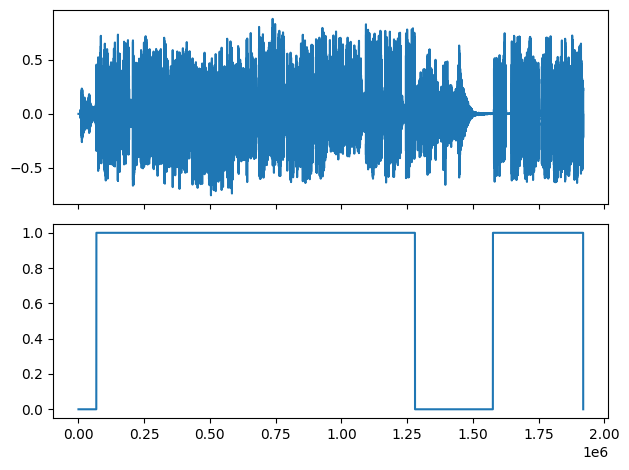

In [4]:
boundaries = vad_model.get_speech_segments(temp_f.name, apply_energy_VAD=False, close_th=0.9)
upsampled_boundaries = vad_model.upsample_boundaries(boundaries, temp_f.name)

vad_model.save_boundaries(boundaries)

fig, ax = plt.subplots(2, 1, sharex=True)

ax[0].plot(wav)
ax[1].plot(upsampled_boundaries[0, :])
fig.tight_layout()

segment_001  0.00  4.24 NON_SPEECH
segment_002  4.24  76.89 SPEECH
segment_003  76.89  77.77 NON_SPEECH
segment_004  77.77  79.99 SPEECH
segment_005  79.99  98.52 NON_SPEECH
segment_006  98.52  102.19 SPEECH
segment_007  102.19  102.64 NON_SPEECH
segment_008  102.64  119.98 SPEECH


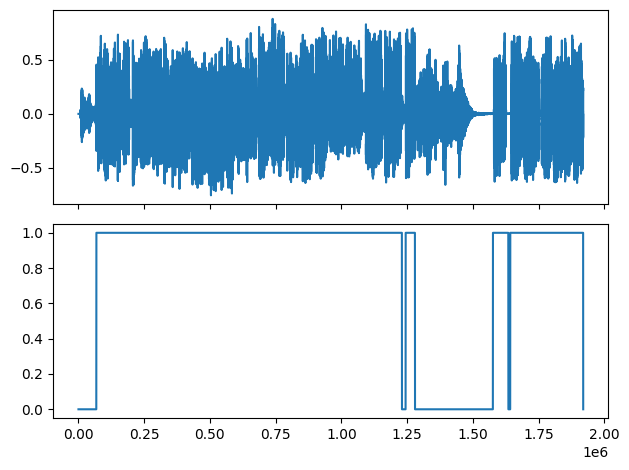

In [5]:
boundaries = vad_model.get_speech_segments(temp_f.name, apply_energy_VAD=False)
upsampled_boundaries = vad_model.upsample_boundaries(boundaries, temp_f.name)

vad_model.save_boundaries(boundaries)

fig, ax = plt.subplots(2, 1, sharex=True)

ax[0].plot(wav)
ax[1].plot(upsampled_boundaries[0, :])
fig.tight_layout()

In [6]:
def display_speech_segments(wav, sample_rate, boundaries):
    for s, e in boundaries:
        seg = wav[int(s*sample_rate): int(e*sample_rate)]
        display(Audio(data=seg, rate=sample_rate))

In [7]:
display_speech_segments(wav, model_sr, boundaries)